<a href="https://colab.research.google.com/github/Somesh99/Machine-Learning/blob/main/Spotify_%2B_Solar_Power_Generation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Members:

      TANISHA YADAV   - DS7A-2116       Data Science

      SOMESH JOSHI    - DS7B-2117       Big Data Analytics

# Data - Spotify

This is a **real world data** scraped from Spotify. 

We asked a volunteer to make a spotify playlist of 1000 songs:

 *  500 liked songs
 * 500 disliked songs

 Using spotify API we scraped the audio features of the songs to predict whether the user(volunteer) will like a song or not.

# Installing Library

In [ ]:
!pip install spotipy

     |████████████████████████████████| 62 kB 591 kB/s 
     |████████████████████████████████| 138 kB 10.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# Importing Libraries

In [ ]:
import spotipy
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

import pandas 
import time

### Secret key for authentication

In [ ]:
auth_manager = SpotifyClientCredentials(client_id = '9675672826724b7d8cb7830d8ad84e95', 
                                        client_secret = '53c94a31af094dfb8a5f08059920c37a')

### Making connection

In [ ]:
sp = spotipy.Spotify(auth_manager = auth_manager)
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id = '9675672826724b7d8cb7830d8ad84e95', client_secret = '53c94a31af094dfb8a5f08059920c37a'))


In [ ]:
sp.audio_features('spotify:track:5PjdY0CKGZdEuoNab3yDmX')

[{'acousticness': 0.0383,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5PjdY0CKGZdEuoNab3yDmX',
  'danceability': 0.591,
  'duration_ms': 141806,
  'energy': 0.764,
  'id': '5PjdY0CKGZdEuoNab3yDmX',
  'instrumentalness': 0,
  'key': 1,
  'liveness': 0.103,
  'loudness': -5.484,
  'mode': 1,
  'speechiness': 0.0483,
  'tempo': 169.928,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/5PjdY0CKGZdEuoNab3yDmX',
  'type': 'audio_features',
  'uri': 'spotify:track:5PjdY0CKGZdEuoNab3yDmX',
  'valence': 0.478}]

### Getting Playlist data

In [ ]:
def getTrackIDs(user, playlist_id):
  track_ids = []
  playlist = sp.user_playlist(user, playlist_id)
  for item in playlist['tracks']['items']:
    track = item['track']
    track_ids.append(track['id'])
  return track_ids



In [ ]:
liked_songs_uri = ['spotify:playlist:6fEs9GcXvFl9cnvOwWgBsz', 'spotify:playlist:1dlIkqKDLkINcxP44Si7NO', 'spotify:playlist:3i3FzJK0kw9T9vuvBtAxdi','spotify:playlist:4zREMkDIsqSlu5pnGhahL8','spotify:playlist:6CKhYcHv4HVf56bu7asJPj']
disliked_songs_uri = ['spotify:playlist:5xNPbVJJ810EVYS2KEsADy','spotify:playlist:76LbC70ExELA9CTuHgVXkd' ,'spotify:playlist:0bdek5Sz7E6s1BSAHCeG54', 'spotify:playlist:3P5qXJYTdjcjIOAOxKMTsb', 'spotify:playlist:7jQfIQACf82RmkFyL1wJ0L']

liked_songs_ids = []
disliked_songs_ids = []
final_track_ids = []

for i in range(len(liked_songs_uri)):
  track_ids = getTrackIDs('spotify',liked_songs_uri[i])
  liked_songs_ids.extend(track_ids)

for i in range(len(disliked_songs_uri)):
  track_ids = getTrackIDs('spotify',disliked_songs_uri[i])
  disliked_songs_ids.extend(track_ids)

final_track_ids = liked_songs_ids + disliked_songs_ids

print(len(final_track_ids))


1000


In [ ]:
def get_track_features(id):
  track_info = sp.track(id)
  features_info = sp.audio_features(id)

# Track info

  name = track_info['name']
  album = track_info['album']['name']
  artist = track_info['album']['artists'][0]['name']
  release_date = track_info['album']['release_date']
  length  = track_info['duration_ms']
  popularity = track_info['popularity']


# Track features

  acousticness = features_info[0]['acousticness']
  danceability = features_info[0]['danceability']
  energy = features_info[0]['energy']
  instrumentalness = features_info[0]['instrumentalness']
  liveness = features_info[0]['liveness']
  loudness = features_info[0]['loudness']
  speechiness = features_info[0]['speechiness']
  tempo = features_info[0]['tempo']
  time_signature = features_info[0]['time_signature']
  key = features_info[0]['key']
  mode = features_info[0]['mode']
  valence = features_info[0]['valence']

  track_data = [name, album, artist, release_date, length, popularity, acousticness,danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature, key, mode, valence]
  return track_data
  


In [ ]:
track_list = []
for i in range(len(final_track_ids)):
  time.sleep(.5)
  track_data = get_track_features(final_track_ids[i])
  track_list.append(track_data)



### Making dataset

In [ ]:
column_names = ['Name', 'Album', 'Artist', 'Release_date', 'Length', 'Popularity', 'Acousticness','Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Time_signature', 'Key', 'Mode', 'Valence']

dataset = pandas.DataFrame(track_list, columns = column_names )


dataset

,Name,Album,Artist,Release_date,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature,Key,Mode,Valence
0,Boyfriend,Rare (Deluxe),Selena Gomez,2020-04-09,161188,58,0.216,0.811,0.5120,0.026600,0.0770,-6.380,0.1730,92.025,4,2,1,0.3360
1,Lose You To Love Me,Rare (Deluxe),Selena Gomez,2020-04-09,206458,60,0.556,0.488,0.3430,0.000000,0.2100,-8.985,0.0436,102.819,4,4,1,0.0978
2,Rare,Rare (Deluxe),Selena Gomez,2020-04-09,220589,56,0.208,0.838,0.5450,0.000080,0.1030,-6.713,0.0706,114.998,4,5,1,0.6310
3,Souvenir,Rare (Deluxe),Selena Gomez,2020-04-09,161605,65,0.207,0.841,0.4790,0.000012,0.1220,-5.837,0.0376,112.968,4,0,0,0.4540
4,Look At Her Now,Rare (Deluxe),Selena Gomez,2020-04-09,162595,57,0.114,0.753,0.5640,0.027300,0.3590,-7.908,0.2520,77.342,5,10,0,0.5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Nordic Light,Nordic Light,Clay Edwards,2016-12-18,203068,36,0.904,0.177,0.1680,0.890000,0.0928,-22.644,0.0302,151.179,4,6,1,0.0396
996,Moonstone,Moonstone,Pim Miles,2018-02-15,206170,27,0.965,0.345,0.0835,0.930000,0.1020,-26.126,0.0367,93.993,4,0,1,0.2030
997,Parc Güell,Barcelona Atmosphere,Barcelona Atmosphere,2018-07-10,208000,0,0.942,0.166,0.1430,0.910000,0.0878,-23.512,0.0448,85.977,4,0,0,0.0342
998,Fragments Café,Paris Atmosphere,Paris Atmosphere,2018-07-10,234666,0,0.951,0.161,0.1220,0.978000,0.0916,-22.329,0.0367,86.119,4,10,1,0.0351


In [ ]:
dataset['Liked'] = 'Yes'
dataset.iloc[500:,-1] = 'No'

dataset.head()

,Name,Album,Artist,Release_date,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature,Key,Mode,Valence,Liked
0,Boyfriend,Rare (Deluxe),Selena Gomez,2020-04-09,161188,58,0.216,0.811,0.512,0.026600,0.077,-6.380,0.1730,92.025,4,2,1,0.3360,Yes
1,Lose You To Love Me,Rare (Deluxe),Selena Gomez,2020-04-09,206458,60,0.556,0.488,0.343,0.000000,0.210,-8.985,0.0436,102.819,4,4,1,0.0978,Yes
2,Rare,Rare (Deluxe),Selena Gomez,2020-04-09,220589,56,0.208,0.838,0.545,0.000080,0.103,-6.713,0.0706,114.998,4,5,1,0.6310,Yes
3,Souvenir,Rare (Deluxe),Selena Gomez,2020-04-09,161605,65,0.207,0.841,0.479,0.000012,0.122,-5.837,0.0376,112.968,4,0,0,0.4540,Yes
4,Look At Her Now,Rare (Deluxe),Selena Gomez,2020-04-09,162595,57,0.114,0.753,0.564,0.027300,0.359,-7.908,0.2520,77.342,5,10,0,0.5500,Yes


In [ ]:
dataset.tail()

,Name,Album,Artist,Release_date,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature,Key,Mode,Valence,Liked
995,Nordic Light,Nordic Light,Clay Edwards,2016-12-18,203068,36,0.904,0.177,0.1680,0.890,0.0928,-22.644,0.0302,151.179,4,6,1,0.0396,No
996,Moonstone,Moonstone,Pim Miles,2018-02-15,206170,27,0.965,0.345,0.0835,0.930,0.1020,-26.126,0.0367,93.993,4,0,1,0.2030,No
997,Parc Güell,Barcelona Atmosphere,Barcelona Atmosphere,2018-07-10,208000,0,0.942,0.166,0.1430,0.910,0.0878,-23.512,0.0448,85.977,4,0,0,0.0342,No
998,Fragments Café,Paris Atmosphere,Paris Atmosphere,2018-07-10,234666,0,0.951,0.161,0.1220,0.978,0.0916,-22.329,0.0367,86.119,4,10,1,0.0351,No
999,Kyoto,Yoga Music,Various Artists,2017-04-22,162776,37,0.980,0.151,0.0244,0.912,0.1100,-32.248,0.0400,65.585,4,6,0,0.0358,No


### Shuffling dataset

In [ ]:
dataset = dataset.sample(frac = 1).reset_index(drop=True)
dataset.head(10)

,Name,Album,Artist,Release_date,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature,Key,Mode,Valence,Liked
0,Rearview Mirror,Rearview Mirror,Angelo Garnier,2021-09-04,194000,66,0.97600,0.167,0.0447,0.949000,0.0911,-30.333,0.0381,73.248,5,9,1,0.1480,No
1,Believe,Revival,Eminem,2017-12-15,315346,0,0.16600,0.886,0.4880,0.000000,0.3430,-5.628,0.1840,130.064,4,1,0,0.1140,No
2,Euphoria,Euphoria,TDJ,2021-10-20,254240,41,0.05060,0.555,0.8860,0.844000,0.1460,-8.553,0.0465,141.955,4,8,1,0.5090,No
3,Forgetting You,Moonlovers - Scarlet Heart Ryeo (Original Tele...,Various Artists,2016-09-06,192430,58,0.58000,0.508,0.5450,0.000000,0.3610,-6.425,0.0370,129.183,4,11,1,0.2330,Yes
4,What Do You Mean?,Purpose (Deluxe),Justin Bieber,2015-11-13,205680,78,0.59000,0.845,0.5670,0.001420,0.0811,-8.118,0.0956,125.020,4,5,0,0.7930,Yes
5,It Ain't Right,It Ain't Right,Shane Codd,2021-11-05,208083,53,0.04140,0.676,0.8960,0.000006,0.0519,-3.706,0.0425,125.997,4,0,0,0.3160,No
6,Butter,Butter,BTS,2021-05-21,164441,44,0.00323,0.759,0.4590,0.000000,0.0906,-5.187,0.0948,109.997,4,8,1,0.6950,Yes
7,Soledad natural,Soledad natural (Ambient version),Sonhos de Solidão,2021-04-07,155030,54,0.98900,0.224,0.0195,0.959000,0.0982,-25.571,0.0383,106.306,4,1,1,0.0728,No
8,NUNU NANA,NUNA,Jessi,2020-07-30,195836,72,0.01980,0.743,0.6890,0.000000,0.7080,-2.846,0.0289,104.936,4,7,1,0.5040,Yes
9,Save Me,The Most Beautiful Moment in Life: Young Forever,BTS,2016-05-02,196505,71,0.02690,0.614,0.8230,0.000000,0.0783,-3.480,0.0620,139.948,4,1,1,0.5390,Yes


# Saving dataset as CSV file

In [ ]:
dataset.to_csv('Spotify_songs_dataset.csv')

# Reading Dataset

In [ ]:
import pandas 
df = pandas.read_csv('Spotify_songs_dataset_final.csv')
df

,Unnamed: 0,Name,Album,Artist,Release_date,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature,Key,Mode,Valence,Liked
0,0,Rearview Mirror,Rearview Mirror,Angelo Garnier,2021-09-04,194000,66,0.97600,0.167,0.0447,0.94900,0.0911,-30.333,0.0381,73.248,5,9,1,0.148,No
1,1,Believe,Revival,Eminem,2017-12-15,315346,0,0.16600,0.886,0.4880,0.00000,0.3430,-5.628,0.1840,130.064,4,1,0,0.114,No
2,2,Euphoria,Euphoria,TDJ,2021-10-20,254240,41,0.05060,0.555,0.8860,0.84400,0.1460,-8.553,0.0465,141.955,4,8,1,0.509,No
3,3,Forgetting You,Moonlovers - Scarlet Heart Ryeo (Original Tele...,Various Artists,2016-09-06,192430,58,0.58000,0.508,0.5450,0.00000,0.3610,-6.425,0.0370,129.183,4,11,1,0.233,Yes
4,4,What Do You Mean?,Purpose (Deluxe),Justin Bieber,2015-11-13,205680,78,0.59000,0.845,0.5670,0.00142,0.0811,-8.118,0.0956,125.020,4,5,0,0.793,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,Diamonds,Love Goes,Sam Smith,2020-10-30,213869,71,0.16100,0.637,0.6660,0.00000,0.1080,-6.773,0.0494,104.020,4,10,0,0.529,Yes
996,996,Walls Could Talk,hopeless fountain kingdom (Deluxe),Halsey,2017-06-02,101789,75,0.12800,0.626,0.4230,0.00000,0.1800,-6.035,0.0513,95.162,4,1,1,0.571,Yes
997,997,Hang Tight,Hang Tight,Eden Prince,2021-06-11,174750,42,0.00203,0.495,0.9450,0.92300,0.1950,-5.870,0.0386,125.032,4,10,1,0.582,No
998,998,Being in Love with U,Harbor,Tomppabeats,2016-05-06,49548,49,0.84800,0.629,0.3340,0.14300,0.1060,-9.781,0.4240,81.953,3,2,1,0.617,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1000 non-null   int64  
 1   Name              1000 non-null   object 
 2   Album             1000 non-null   object 
 3   Artist            1000 non-null   object 
 4   Release_date      1000 non-null   object 
 5   Length            1000 non-null   int64  
 6   Popularity        1000 non-null   int64  
 7   Acousticness      1000 non-null   float64
 8   Danceability      1000 non-null   float64
 9   Energy            1000 non-null   float64
 10  Instrumentalness  1000 non-null   float64
 11  Liveness          1000 non-null   float64
 12  Loudness          1000 non-null   float64
 13  Speechiness       1000 non-null   float64
 14  Tempo             1000 non-null   float64
 15  Time_signature    1000 non-null   int64  
 16  Key               1000 non-null   int64  
 

# Dependent and Independent Variables

In [ ]:
X = df.drop(columns = ['Unnamed: 0','Name','Album','Artist','Length','Liked'])
y = df['Liked']

In [ ]:
X.head()

,Release_date,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature,Key,Mode,Valence
0,2021-09-04,66,0.9760,0.167,0.0447,0.94900,0.0911,-30.333,0.0381,73.248,5,9,1,0.148
1,2017-12-15,0,0.1660,0.886,0.4880,0.00000,0.3430,-5.628,0.1840,130.064,4,1,0,0.114
2,2021-10-20,41,0.0506,0.555,0.8860,0.84400,0.1460,-8.553,0.0465,141.955,4,8,1,0.509
3,2016-09-06,58,0.5800,0.508,0.5450,0.00000,0.3610,-6.425,0.0370,129.183,4,11,1,0.233
4,2015-11-13,78,0.5900,0.845,0.5670,0.00142,0.0811,-8.118,0.0956,125.020,4,5,0,0.793


In [ ]:
y.replace({"No": 0,
           "Yes" : 1}, inplace = True)


# Making a new column - Released_year_diff

Extracting year from **Released_year** column and subtracting from 2021 to make a new column showing how many years old the song is.

In [ ]:
X['Released_year'] = X['Release_date'].apply(lambda x : x.split('-')[0])
X['Released_year_diff'] = 2021 - X['Release_date'].apply(lambda x : int(x.split('-')[0]))
X.head()

,Release_date,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature,Key,Mode,Valence,Released_year,Released_year_diff
0,2021-09-04,66,0.9760,0.167,0.0447,0.94900,0.0911,-30.333,0.0381,73.248,5,9,1,0.148,2021,0
1,2017-12-15,0,0.1660,0.886,0.4880,0.00000,0.3430,-5.628,0.1840,130.064,4,1,0,0.114,2017,4
2,2021-10-20,41,0.0506,0.555,0.8860,0.84400,0.1460,-8.553,0.0465,141.955,4,8,1,0.509,2021,0
3,2016-09-06,58,0.5800,0.508,0.5450,0.00000,0.3610,-6.425,0.0370,129.183,4,11,1,0.233,2016,5
4,2015-11-13,78,0.5900,0.845,0.5670,0.00142,0.0811,-8.118,0.0956,125.020,4,5,0,0.793,2015,6


In [ ]:
X = X.drop(columns = ['Release_date','Released_year'])
X.head()

,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature,Key,Mode,Valence,Released_year_diff
0,66,0.9760,0.167,0.0447,0.94900,0.0911,-30.333,0.0381,73.248,5,9,1,0.148,0
1,0,0.1660,0.886,0.4880,0.00000,0.3430,-5.628,0.1840,130.064,4,1,0,0.114,4
2,41,0.0506,0.555,0.8860,0.84400,0.1460,-8.553,0.0465,141.955,4,8,1,0.509,0
3,58,0.5800,0.508,0.5450,0.00000,0.3610,-6.425,0.0370,129.183,4,11,1,0.233,5
4,78,0.5900,0.845,0.5670,0.00142,0.0811,-8.118,0.0956,125.020,4,5,0,0.793,6


## Splitting the dataset as training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 45)
X_train.shape, X_test.shape

((900, 14), (100, 14))

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pandas.DataFrame(sc.fit_transform(X_train),columns = X_train.columns)
X_train.head()

,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature,Key,Mode,Valence,Released_year_diff
0,-0.492062,0.235480,0.484560,0.545618,1.645059,-0.431115,0.422895,-0.070148,0.285711,0.155818,-1.492122,-1.128152,0.613284,-0.735782
1,0.688995,-0.742014,0.565869,0.892094,-0.617229,0.257486,0.670044,0.039220,-0.816168,0.155818,0.183722,0.886405,0.408003,0.260762
2,-2.080379,2.028831,-1.121292,-2.131763,1.749009,-0.596538,-2.557904,-0.410751,-1.652637,0.155818,-1.212815,0.886405,-1.370050,0.260762
3,0.037377,-0.799531,0.540460,1.092685,-0.497413,-0.130347,0.240186,0.095466,0.285391,0.155818,1.300952,-1.128152,-1.471901,-0.735782
4,0.322460,-0.890319,0.454069,0.742562,-0.617212,1.587198,0.529389,0.268372,0.002468,0.155818,-1.212815,0.886405,1.122540,-0.735782


In [ ]:
X_test = pandas.DataFrame(sc.transform(X_test),columns = X_train.columns)
X_test.head()

,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_signature,Key,Mode,Valence,Released_year_diff
0,-0.492062,0.447851,-2.320599,-1.321703,1.535637,-0.423200,-1.337557,-0.564908,-1.639342,0.155818,-1.212815,0.886405,-1.537433,0.011626
1,1.340612,-0.836106,0.332106,0.665973,-0.617210,-0.478605,0.701100,-0.436791,-0.635104,0.155818,0.742337,0.886405,0.561964,-0.237510
2,1.299886,0.672020,0.718323,-0.304159,-0.617222,-0.462775,0.190497,1.695363,-0.886048,0.155818,1.021644,0.886405,-0.030194,0.011626
3,-2.080379,1.273736,0.692914,-0.446396,1.456307,-0.439030,-1.077597,2.570306,-1.525570,0.155818,-1.492122,0.886405,-0.180207,0.509899
4,0.403912,-0.760891,1.124868,-0.293217,-0.617082,-0.439030,0.282111,0.612099,-0.269785,3.077403,0.183722,-1.128152,1.276501,-0.486646


# Building Model and Evaluating

### Logistic Regression

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)
print(classification_report(pred_lr, y_test))

              precision    recall  f1-score   support

          No       0.78      0.89      0.83        45
         Yes       0.90      0.80      0.85        55

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.85      0.84      0.84       100



### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
pred_nb = model_nb.predict(X_test)
print(classification_report(pred_nb, y_test))

              precision    recall  f1-score   support

          No       0.73      0.90      0.80        41
         Yes       0.92      0.76      0.83        59

    accuracy                           0.82       100
   macro avg       0.82      0.83      0.82       100
weighted avg       0.84      0.82      0.82       100



### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train, y_train)
pred_svm = model_svm.predict(X_test)
print(classification_report(pred_svm, y_test))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90        49
         Yes       0.92      0.88      0.90        51

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

### Logistic Regression

In [ ]:
?LogisticRegression

In [ ]:
grid = {'penalty' : ['l1', 'l2','elasticnet'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','sag', 'saga' , 'newton-cg','liblinear']
    }

grid_model_lr = GridSearchCV(estimator = model_lr, verbose=1, param_grid=grid, n_jobs=-1)
grid_model_lr.fit(X,y)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
800 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: So

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'sag', 'saga', 'newton-cg',
                                    'liblinear']},
             verbose=1)

In [ ]:
grid_model_lr.best_score_

0.861

In [ ]:
grid_model_lr.best_params_

{'C': 3792.690190732246, 'penalty': 'l2', 'solver': 'newton-cg'}

### Naive Bayes

In [ ]:
?GaussianNB

In [ ]:
grid = {'var_smoothing': np.logspace(0, -9, 100)        # 10^0 to 10^-9 100 numbers
    }

grid_model_nb = GridSearchCV(estimator = model_nb, verbose=1, param_grid=grid, n_jobs=-1)
grid_model_nb.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [ ]:
grid_model_nb.best_score_

0.818

In [ ]:
grid_model_nb.best_params_

{'var_smoothing': 4.3287612810830526e-08}

### Support vaectoe Machine

In [ ]:
?SVC


In [ ]:
grid = {    'C' : np.logspace(0,3,5),
            'kernel' : ['linear','poly', 'rbf' , 'sigmoid'],
            'gamma' : np.logspace(0,-4,5) 
            
    }

grid_model_svm = GridSearchCV(estimator = model_svm, verbose=1, param_grid=grid, n_jobs=-1)
grid_model_svm.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([   1.        ,    5.62341325,   31.6227766 ,  177.827941  ,
       1000.        ]),
                         'gamma': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [ ]:
grid_model_svm.best_score_


0.9088888888888889

In [ ]:
grid_model_svm.best_params_


{'C': 31.622776601683793, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
pred = grid_model_svm.predict(X_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

          No       0.86      0.96      0.91        46
         Yes       0.96      0.87      0.91        54

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100






      The highest accuracy achieved is 91% by Support Vector Classifier.
      

# Power Generation by Solar Panels

This is a regression problem where the objective is to find the amount of power generated by the solar power plant.

In [ ]:
import pandas
import numpy as np

### Reading dataset

In [ ]:
df = pandas.read_csv('Power Generation Plant 2.csv')
df

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,wind_speed_10_m_above_gnd,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,6.37,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.100950
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,5.15,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.999400
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,4.68,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.849300
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,3.60,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.609200
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,6.21,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.203400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,21.66,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,11.97,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,9.01,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,7.34,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

All columns are numerical.

In [ ]:
df.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,wind_speed_10_m_above_gnd,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,16.228787,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,9.876948,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,9.010000,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,14.460000,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,21.840000,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,61.180000,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


### Checking Missing Values

In [ ]:
df.isnull().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

No missing values in the dataset

# Correlation

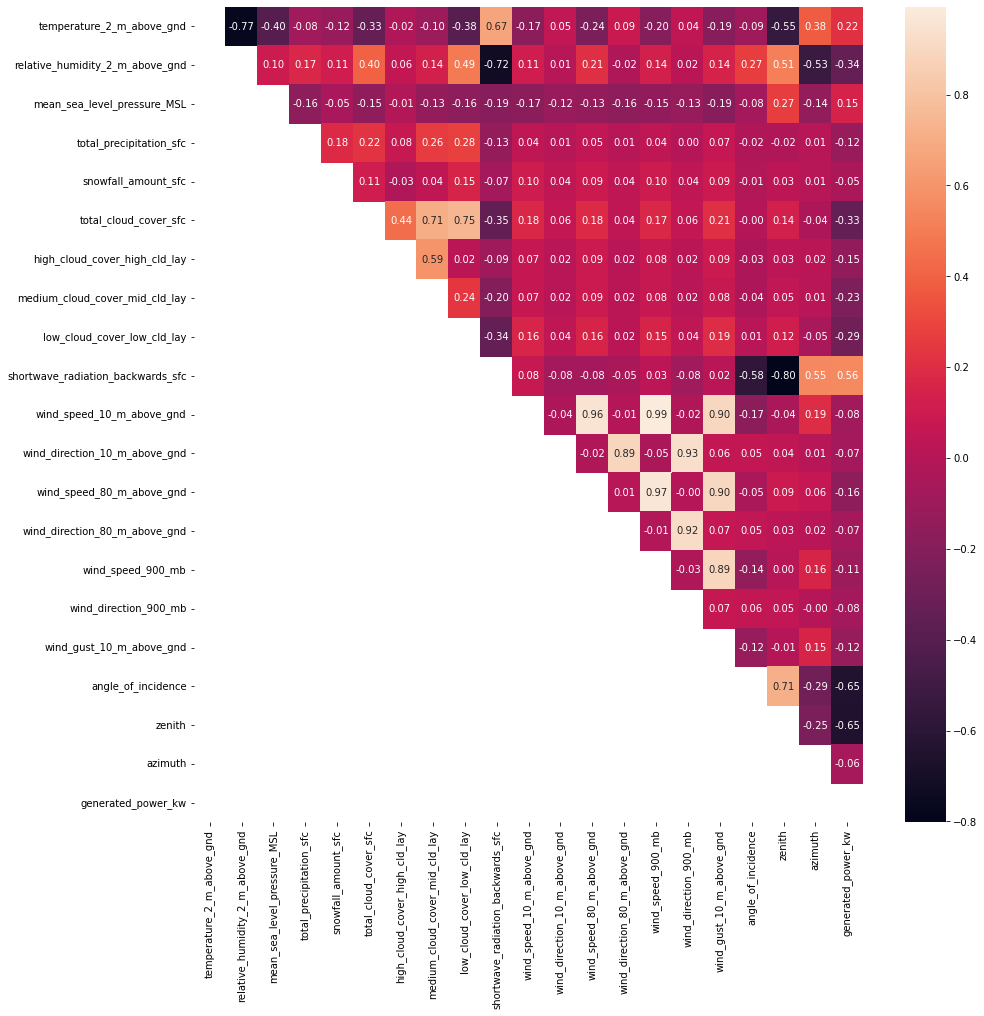

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize = (15,15))
# Create correlation matrix
corr_matrix = df.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

sns.heatmap(upper, annot = True, fmt = '0.2f')

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] >= 0.90)]

In [ ]:
to_drop

['wind_speed_80_m_above_gnd', 'wind_speed_900_mb', 'wind_direction_900_mb']

In [ ]:
df2 = df.drop(columns = to_drop)
df2.shape

(4213, 18)

### Separating dependent and independent variables

In [ ]:
X = df2.drop(columns =['generated_power_kw'])
y = df2['generated_power_kw']
X.shape, y.shape

((4213, 17), (4213,))

###  Splitting the dataset into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 45)     # 75-25 : training - testing
X_train.shape, X_test.shape

((3159, 17), (1054, 17))

### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pandas.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_train.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,wind_speed_10_m_above_gnd,wind_direction_10_m_above_gnd,wind_direction_80_m_above_gnd,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth
0,-0.073549,-0.231465,-0.978826,-0.184266,-0.065804,0.012774,-0.477191,0.402561,-0.038351,-0.539275,-1.157232,0.871944,0.737217,-0.785113,0.129846,-0.830113,1.418275
1,0.418070,-0.018710,0.367987,-0.184266,-0.065804,0.804881,-0.316510,-0.554563,1.249380,0.304960,-0.243703,1.005164,1.006558,-0.211079,-0.473477,0.306012,0.768568
2,-0.676180,0.406802,-0.377058,-0.184266,-0.065804,1.527096,2.736434,2.180077,-0.563956,0.113088,0.533661,0.801372,0.815006,0.965691,-0.765674,0.012984,0.676603
3,1.003709,-0.614425,-1.064792,-0.184266,-0.065804,1.527096,-0.477191,-0.281099,2.064067,0.196233,-0.384949,1.102154,1.165752,-0.124974,-0.970732,-1.470017,0.672841
4,0.100896,-0.784630,1.055721,-0.184266,-0.065804,1.527096,2.736434,2.180077,-0.563956,-0.008430,-0.092295,-0.292408,-0.251047,-0.584201,-0.909051,0.327002,0.451491


In [ ]:
X_test = pandas.DataFrame(scaler.transform(X_test),columns = X_test.columns)
X_test.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,wind_speed_10_m_above_gnd,wind_direction_10_m_above_gnd,wind_direction_80_m_above_gnd,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth
0,0.188119,-0.784630,1.428244,-0.184266,-0.065804,1.527096,2.736434,2.180077,-0.563956,0.036340,-0.035390,-0.312410,-0.258093,-0.612903,-0.904930,0.326502,0.455454
1,-1.472513,1.172722,1.987028,-0.184266,-0.065804,-0.802630,-0.477191,-0.554563,-0.563956,-1.386707,-0.483517,-0.155414,-0.203854,-0.383289,0.270352,1.161671,-0.624124
2,2.111552,-1.550550,-0.291091,-0.184266,-0.065804,-0.802630,-0.477191,-0.554563,-0.563956,1.868713,-0.324996,0.158671,0.192230,-0.469394,-0.853853,-2.125356,0.256004
3,-0.079213,-0.231465,-0.993153,-0.184266,-0.065804,1.084448,-0.477191,-0.281099,1.564742,-0.216291,-1.573858,0.961292,-0.097230,-1.215639,-0.850157,-2.123148,0.292478
4,-1.035266,0.619557,-0.735253,1.004901,-0.065804,1.527096,-0.477191,0.976835,2.064067,-0.369788,0.569226,1.053093,1.085552,0.276850,-0.048816,0.783016,0.876736


# Model Building

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

mod_lr = LinearRegression()
mod_lr.fit(X_train, y_train)
pred_mod_lr = mod_lr.predict(X_test)
pred_mod_lr

array([1206.04409315,  986.88804807, 2428.53472186, ...,  987.05196035,
        841.23532228, 1461.47327275])

In [ ]:
mod_lr.coef_

array([ -84.56161761,  -97.42014781,  103.68424939,  -11.5924093 ,
         12.04218471,  -74.00689232,  -49.72927529,  -31.34892877,
        -46.70119233,  340.38651214,  -43.16770671,   15.88744472,
         -2.96258618,  -26.27955332, -400.33884361, -152.82534198,
       -390.98568932])

In [ ]:
mod_lr.intercept_

1127.075203368363

### Evaluating Linear Regression

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f"Mean Absolute Error : {mean_absolute_error(y_test, pred_mod_lr)} ")
print(f"Root Mean Square Error : {mean_squared_error(y_test, pred_mod_lr, squared = False)} ")
print(f"R2 score : {r2_score(y_test, pred_mod_lr)} ")


Mean Absolute Error : 398.04275604152747 
Root Mean Square Error : 516.7961104740042 
R2 score : 0.6993456936271762 


### SVM

In [ ]:
from sklearn.svm import SVR

mod_svr = SVR()
mod_svr.fit(X_train, y_train)
pred_mod_svr = mod_svr.predict(X_test)
pred_mod_svr

array([ 887.83020287,  875.10739919, 1203.81363857, ...,  978.69285375,
        965.97981032,  891.02763336])

### Evaluating SVM

In [ ]:

print(f"Mean Absolute Error : {mean_absolute_error(y_test, pred_mod_svr)} ")
print(f"Root Mean Square Error : {mean_squared_error(y_test, pred_mod_svr, squared = False)} ")
print(f"R2 score : {r2_score(y_test, pred_mod_svr)} ")


Mean Absolute Error : 750.4758031549334 
Root Mean Square Error : 863.1714476163921 
R2 score : 0.16126824080023272 


# PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train)
X_train_pca.shape

(3159, 11)

In [ ]:
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(1054, 11)

# After PCA

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

mod_lr_pca = LinearRegression()
mod_lr_pca.fit(X_train_pca, y_train)
pred_mod_lr_pca = mod_lr_pca.predict(X_test_pca)
pred_mod_lr_pca

array([1137.68865895, 1104.36276977, 2492.31411923, ...,  978.4216448 ,
        794.34206301, 1557.94664721])

In [ ]:
mod_lr_pca.coef_

array([-246.8750676 ,  -14.79745159,  113.7628788 ,   27.57884165,
        120.1277437 , -419.00899779,  -69.37802359,  322.95983722,
         86.89248056,  -68.55962904,   87.8676271 ])

In [ ]:
mod_lr_pca.intercept_

1127.0752033683614

### Evaluating Linear Regression after PCA

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f"Mean Absolute Error : {mean_absolute_error(y_test, pred_mod_lr_pca)} ")
print(f"Root Mean Square Error : {mean_squared_error(y_test, pred_mod_lr_pca, squared = False)} ")
print(f"R2 score : {r2_score(y_test, pred_mod_lr_pca)} ")


Mean Absolute Error : 409.08017321519907 
Root Mean Square Error : 525.9129493020575 
R2 score : 0.6886443975463437 


In [ ]:
mod_lr_pca.score(X_test_pca, y_test)

0.6886443975463437

### SVM

In [ ]:
from sklearn.svm import SVR

mod_svr_pca = SVR()
mod_svr_pca.fit(X_train_pca, y_train)
pred_mod_svr_pca = mod_svr_pca.predict(X_test_pca)
pred_mod_svr_pca

array([ 886.75249908,  874.89584309, 1212.13635267, ...,  979.24362893,
        971.31865803,  893.80927084])

### Evaluating SVM after PCA

In [ ]:
print(f"Mean Absolute Error : {mean_absolute_error(y_test, pred_mod_svr_pca)} ")
print(f"Root Mean Square Error : {mean_squared_error(y_test, pred_mod_svr_pca, squared = False)} ")
print(f"R2 score : {r2_score(y_test, pred_mod_svr_pca)} ")


Mean Absolute Error : 745.9787862695097 
Root Mean Square Error : 857.5948431844835 
R2 score : 0.17207065151239231 


In [ ]:
mod_svr_pca.score(X_test_pca, y_test)

0.17207065151239231

# Hyperparameter Tuning

### SVM

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
grid = {    'C' : np.logspace(0,3,5),
            'kernel' : ['linear','poly', 'rbf' ],
            'gamma' : np.logspace(0,-4,5) 
            
    }

grid_model_svm_pca = GridSearchCV(estimator = mod_svr_pca, verbose=1, param_grid=grid, n_jobs=-1)
grid_model_svm_pca.fit(X_train_pca, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': array([   1.        ,    5.62341325,   31.6227766 ,  177.827941  ,
       1000.        ]),
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=1)

In [ ]:
grid_model_svm_pca.best_score_

0.7717140517199716

In [ ]:
grid_model_svm_pca.best_params_

{'C': 1000.0, 'kernel': 'rbf'}